In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [10]:
from desitarget.targetmask import desi_mask

In [14]:
%matplotlib inline

In [2]:
rootdir = os.path.join(os.getenv('DESI_ROOT'), 'datachallenge', 
                       'reference_runs', '18.2a', 'targets')

In [3]:
targets = Table.read(os.path.join(rootdir, 'targets.fits'))
targets

BRICKID,BRICKNAME,BRICK_OBJID,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SUBPRIORITY,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,HPXPIXEL
int32,str8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int64,int64,int64,int64,int64
5261,1526p282,0,152.762924194,28.3125839233,4.87419,12.4022,21.5929,16.4725,10.9474,0.940107,0.95925,0.97681,0.99647,0.997831,52.4807,7.72681,1.87068,57.544,13.1826,2.51189,0.0276732,0.438591,-0.000956611,-0.000314208,0.000593837,0.452496,0.00100628,-0.00102234,0.356810355942,288230398217945088,1152921504606846976,65537,0,0
5261,1524p280,1,152.563858032,28.1027755737,21.6167,37.2972,55.9602,51.4054,38.1055,0.93063,0.952726,0.973057,0.995893,0.997476,52.4807,7.72681,1.87068,57.544,13.1826,2.51189,0.0276732,0.438591,3.15721,0.0556914,-0.000684553,0.866786,-0.106927,-0.0230106,0.568604199297,288230398217945089,1152921504606846976,131074,0,0
5261,1526p285,2,152.636505127,28.5471324921,18.8227,48.336,84.6381,76.4054,51.4296,0.948148,0.964769,0.979976,0.996956,0.99813,52.4807,7.72681,1.87068,57.544,13.1826,2.51189,0.0276732,0.438591,53.4724,0.164367,-0.0889053,0.393993,-0.256706,-0.0100387,0.93292545864,288230398217945090,1152921504606846976,131074,0,0
5261,1523p282,3,152.453033447,28.3228969574,17.3274,69.1105,146.392,176.067,125.94,0.939746,0.959002,0.976667,0.996449,0.997817,52.4807,7.72681,1.87068,57.544,13.1826,2.51189,0.0276732,0.438591,0.38233,-0.17208,-0.170571,-0.000191608,-0.00332903,-0.00330882,0.588079222788,288230398217945091,1152921504606846976,131074,0,0
5261,1529p282,4,152.821365356,28.337770462,1.97005,9.62195,21.3818,35.9626,27.7675,0.93711,0.957189,0.975626,0.996288,0.997719,52.4807,7.72681,1.87068,57.544,13.1826,2.51189,0.0276732,0.438591,-7.74865e-05,0.00207773,0.000594246,1.11604,0.119471,-0.221381,0.175434315238,288230398217945092,1152921504606846976,65537,0,0
5261,1526p282,5,152.510864258,28.2928829193,10.7094,22.8213,34.591,32.8464,26.5192,0.939185,0.958616,0.976446,0.996414,0.997796,52.4807,7.72681,1.87068,57.544,13.1826,2.51189,0.0276732,0.438591,1.983,-0.26877,0.390211,-0.000206943,5.04955e-05,4.57717e-05,0.365531304502,288230398217945093,1152921504606846976,131074,0,0
5261,1526p282,6,152.763931274,28.168346405,14.2403,37.6313,71.8919,77.2457,54.4891,0.931339,0.953214,0.973339,0.995936,0.997502,52.4807,7.72681,1.87068,57.544,13.1826,2.51189,0.0276732,0.438591,0.000777539,0.00166061,0.000351365,2.59296,0.0972936,-0.312624,0.951183062125,288230398217945094,1152921504606846976,131074,0,0
5261,1526p285,7,152.558761597,28.3912391663,3.47569,10.9017,21.2698,29.0895,20.245,0.942218,0.9607,0.977643,0.996598,0.99791,52.4807,7.72681,1.87068,57.544,13.1826,2.51189,0.0276732,0.438591,-0.000556191,0.000258831,-0.000925425,1.46512,0.181207,0.21468,0.167046833546,288230398217945095,1152921504606846976,65537,0,0
5261,1526p282,8,152.775146484,28.182674408,14.9511,65.0984,145.076,204.618,152.096,0.931753,0.9535,0.973503,0.995961,0.997518,52.4807,7.72681,1.87068,57.544,13.1826,2.51189,0.0276732,0.438591,0.00235169,-0.000887671,-0.000431117,2.06847,0.0883114,0.104788,0.680662990024,288230398217945096,1152921504606846976,131074,0,0


In [5]:
truth = Table.read(os.path.join(rootdir, 'truth.fits'))
truth

TARGETID,MOCKID,CONTAM_TARGET,TRUEZ,TRUESPECTYPE,TEMPLATETYPE,TEMPLATESUBTYPE,TEMPLATEID,SEED,MAG,VDISP,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,OIIFLUX,HBETAFLUX,TEFF,LOGG,FEH
int64,int64,int64,float32,str10,str10,str10,int32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
288230398217945088,15594312,0,0.134829,GALAXY,BGS,,3627,1482857632,19.8104,61.5363,5.24496,13.0271,22.0723,17.0456,11.0778,-1.0,0.0,-1.0,-1.0,-1.0
288230398217945089,19713506,0,0.131031,GALAXY,BGS,,3100,1847516324,18.5536,61.5363,23.2365,39.1643,57.4299,52.1437,38.0304,-1.0,1.62485e-15,-1.0,-1.0,-1.0
288230398217945090,17928726,0,0.145801,GALAXY,BGS,,1281,1159188526,18.3514,61.5363,19.8501,50.1084,86.5181,74.6362,51.4383,-1.0,0.0,-1.0,-1.0,-1.0
288230398217945091,19762079,0,0.295097,GALAXY,BGS,,5168,1664239784,17.9932,61.5363,18.4524,71.9985,149.989,178.462,126.497,-1.0,0.0,-1.0,-1.0,-1.0
288230398217945092,13979089,0,0.404595,GALAXY,BGS,,6077,236582212,20.1547,61.5363,2.09978,9.95809,21.8389,36.396,28.0412,-1.0,0.0,-1.0,-1.0,-1.0
288230398217945093,16459200,0,0.264106,GALAXY,BGS,,1126,1991162537,19.1176,61.5363,11.3866,23.7894,35.4239,33.6405,26.4355,-1.0,6.34972e-16,-1.0,-1.0,-1.0
288230398217945094,18522434,0,0.124415,GALAXY,BGS,,5431,266394818,18.6124,61.5363,15.305,39.5149,73.9385,79.3565,54.7434,-1.0,1.20094e-16,-1.0,-1.0,-1.0
288230398217945095,17843316,0,0.32049,GALAXY,BGS,,891,465634076,19.9593,61.5363,3.73762,11.398,21.8683,27.3294,20.5494,-1.0,8.81773e-17,-1.0,-1.0,-1.0
288230398217945096,16440187,0,0.294273,GALAXY,BGS,,3795,1715747948,18.0603,61.5363,16.0364,68.1686,149.188,206.879,152.196,-1.0,0.0,-1.0,-1.0,-1.0


In [18]:
rmag = 22.5 - 2.5 * np.log10(truth['FLUX_R'])
oiiflux = truth['OIIFLUX']

In [20]:
elg = ( (targets['DESI_TARGET'] & desi_mask.ELG) != 0 ) * (oiiflux > 0)
np.count_nonzero(elg), len(targets)

(81877, 241273)

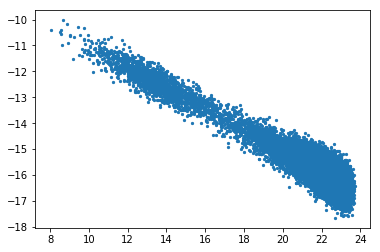

In [26]:
plt.scatter(rmag[elg], np.log10(oiiflux[elg]), s=5)